# 测试代码
## 本文件用以检查ISAM同时追踪区域与行业时其贡献量的矛盾问题

---
*@author: Evan*\
*@date: 2023-09-07*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../../../src/')
from namelist import *

## 读取数据

In [2]:
chem = xr.open_dataset(cmaqfile)
isam = xr.open_dataset(isamfile)
isam

<xarray.Dataset>
Dimensions:    (time: 744, level: 26, y: 138, x: 135)
Coordinates:
  * time       (time) datetime64[ns] 2023-05-01 ... 2023-05-31T23:00:00
  * level      (level) float64 1e+03 998.0 995.8 993.4 ... 703.9 659.0 616.2
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables: (12/13)
    O3_Nor     (time, level, y, x) float32 ...
    O3_NW      (time, level, y, x) float32 ...
    O3_FY      (time, level, y, x) float32 ...
    O3_SE      (time, level, y, x) float32 ...
    O3_XS      (time, level, y, x) float32 ...
    O3_XSI     (time, level, y, x) float32 ...
    ...         ...
    O3_XST     (time, level, y, x) float32 ...
    O3_XSR     (time, level, y, x) float32 ...
    O3_XSS     (time, level, y, x) float32 ...
    O3_OTH     (time, level, y, x) float32 ...
    O3_ICO     (time, level, y, x) float32 ...
    O3_BCO     (time, level, y, x) float32 ...
Attributes:
    case:        Xiaoshan_202305
    grid:        CN3XS_135X138
    createtime:  2023-08-28

In [8]:
def calc_mean(ds, tag, lats, lons):
    '''
    Calculate the mean of a subset of a given dataset.

    Args:
        ds (xarray.Dataset): The dataset.
        tag (str): The variable in the dataset.
        lats (tuple): The latitude range in the format (start, end).
        lons (tuple): The longitude range in the format (start, end).

    Returns:
        float: The mean value of the subset.

    '''

    # Select the subset of the dataset based on the given latitude and longitude ranges
    subset = ds[tag][:, 0, lats[0]:lats[1], lons[0]:lons[1]]

    # Calculate the mean along the 'y' and 'x' dimensions
    mean = subset.mean(dim=['y', 'x'])

    # Return the mean value
    return mean

In [35]:
lats = [70,80]
lons = [70,80]

O3 = calc_mean(chem, 'O3', lats, lons)

Nor = calc_mean(isam, 'O3_Nor', lats, lons)
NW = calc_mean(isam, 'O3_NW', lats, lons)
SE = calc_mean(isam, 'O3_SE', lats, lons)
FY = calc_mean(isam, 'O3_FY', lats, lons)
OTH = calc_mean(isam, 'O3_OTH', lats, lons)
BCO = calc_mean(isam, 'O3_BCO', lats, lons)
ICO = calc_mean(isam, 'O3_ICO', lats, lons)
XS = calc_mean(isam, 'O3_XS', lats, lons)
XSI = calc_mean(isam, 'O3_XSI', lats, lons)
XSP = calc_mean(isam, 'O3_XSP', lats, lons)
XST = calc_mean(isam, 'O3_XST', lats, lons)
XSR = calc_mean(isam, 'O3_XSR', lats, lons)
XSS = calc_mean(isam, 'O3_XSS', lats, lons)

lon = isam.longitude
lat = isam.latitude

In [12]:
def calc_mda8(input):
    """
    Calculates the maximum daily average over an 8-hour period.
    
    Parameters:
        input (xarray.DataArray): Input data array with a 'time' dimension.
        
    Returns:
        xarray.DataArray: Output data array with the maximum daily average.
    """
    # Calculate the rolling mean over an 8-hour period
    temp = input.rolling(time=8).mean()
    
    # Resample the data to daily frequency and find the maximum value
    output = temp.resample({'time':'D'}).max(dim='time')
    
    return output

In [19]:
# create a dataframe from the mda8 data
df = pd.DataFrame(
    index = pd.date_range(timestart,timeend,freq='D'),
    data = dict(
        O3 = calc_mda8(O3),
        Nor = calc_mda8(Nor),
        NW = calc_mda8(NW),
        SE = calc_mda8(SE),
        FY = calc_mda8(FY),
        OTH = calc_mda8(OTH),
        BCO = calc_mda8(BCO),
        ICO = calc_mda8(ICO),
        XS = calc_mda8(XS),
        XSI = calc_mda8(XSI),
        XST = calc_mda8(XST),
        XSR = calc_mda8(XSR),
        XSS = calc_mda8(XSS)
    )
)

In [36]:
# create a dataframe from the mda8 data
df = pd.DataFrame(
    index = pd.date_range(timestart,timeend,freq='h'),
    data = dict(
        O3 = (O3),
        Nor = (Nor),
        NW = (NW),
        SE = (SE),
        FY = (FY),
        OTH = (OTH),
        BCO = (BCO),
        ICO = (ICO),
        XS = (XS),
        XSI = (XSI),
        XSP = (XSP),
        XST = (XST),
        XSR = (XSR),
        XSS = (XSS)
    )
)
df

,O3,Nor,NW,SE,FY,OTH,BCO,ICO,XS,XSI,XSP,XST,XSR,XSS
2023-05-01 00:00:00,14.843851,0.903441,0.928211,1.241091,0.848399,3.532992,4.406185,4.043944e-01,0.732955,0.619704,0.501651,0.604159,0.120669,2.142856e-22
2023-05-01 01:00:00,6.625988,0.310716,0.332283,0.406282,0.336177,1.729751,2.451952,1.677092e-01,0.246768,0.211367,0.176324,0.209022,0.047637,2.142856e-22
2023-05-01 02:00:00,11.305099,0.459618,0.521076,0.530433,0.587778,3.047439,4.436100,3.187873e-01,0.367241,0.338649,0.287477,0.330183,0.080320,2.142856e-22
2023-05-01 03:00:00,15.766975,0.608649,0.704420,0.698006,0.813916,4.288463,6.187696,4.691323e-01,0.521261,0.485136,0.409813,0.471053,0.109431,2.142856e-22
2023-05-01 04:00:00,13.868626,0.478333,0.553328,0.541851,0.632266,3.757457,5.782135,4.117374e-01,0.446384,0.418401,0.351655,0.404574,0.090502,2.142856e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 19:00:00,105.617111,5.202014,4.951877,4.993834,4.993446,22.799732,37.717052,3.790775e-05,4.999612,5.012955,4.961926,4.919911,5.064679,3.790699e-05
2023-05-31 20:00:00,59.481449,1.316091,1.323188,1.330278,1.317650,11.224530,36.394901,1.914153e-05,1.309361,1.308764,1.304170,1.306285,1.346185,1.914105e-05
2023-05-31 21:00:00,39.036572,0.180742,0.186239,0.190508,0.185604,4.894492,32.479027,7.953550e-06,0.177417,0.181079,0.179586,0.192817,0.189044,7.953317e-06
2023-05-31 22:00:00,32.474022,0.010465,0.010632,0.011286,0.010755,3.483820,28.891735,7.237280e-07,0.009817,0.010940,0.010240,0.012392,0.011939,7.237052e-07


In [37]:
columns_1 = ['Nor', 'NW', 'SE', 'FY', 'OTH', 'BCO', 'ICO', 'XS', 'XSI','XSP', 'XST', 'XSR', 'XSS']
columns_2 = ['Nor', 'NW', 'SE', 'FY', 'OTH', 'BCO', 'ICO', 'XS',]
df['sum_all'] = df[columns_1].sum(axis=1)
df['sum_regions'] = df[columns_2].sum(axis=1)
df

,O3,Nor,NW,SE,FY,OTH,BCO,ICO,XS,XSI,XSP,XST,XSR,XSS,sum_all,sum_regions
2023-05-01 00:00:00,14.843851,0.903441,0.928211,1.241091,0.848399,3.532992,4.406185,4.043944e-01,0.732955,0.619704,0.501651,0.604159,0.120669,2.142856e-22,14.843851,12.997668
2023-05-01 01:00:00,6.625988,0.310716,0.332283,0.406282,0.336177,1.729751,2.451952,1.677092e-01,0.246768,0.211367,0.176324,0.209022,0.047637,2.142856e-22,6.625988,5.981638
2023-05-01 02:00:00,11.305099,0.459618,0.521076,0.530433,0.587778,3.047439,4.436100,3.187873e-01,0.367241,0.338649,0.287477,0.330183,0.080320,2.142856e-22,11.305102,10.268474
2023-05-01 03:00:00,15.766975,0.608649,0.704420,0.698006,0.813916,4.288463,6.187696,4.691323e-01,0.521261,0.485136,0.409813,0.471053,0.109431,2.142856e-22,15.766976,14.291542
2023-05-01 04:00:00,13.868626,0.478333,0.553328,0.541851,0.632266,3.757457,5.782135,4.117374e-01,0.446384,0.418401,0.351655,0.404574,0.090502,2.142856e-22,13.868625,12.603493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 19:00:00,105.617111,5.202014,4.951877,4.993834,4.993446,22.799732,37.717052,3.790775e-05,4.999612,5.012955,4.961926,4.919911,5.064679,3.790699e-05,105.617126,85.657608
2023-05-31 20:00:00,59.481449,1.316091,1.323188,1.330278,1.317650,11.224530,36.394901,1.914153e-05,1.309361,1.308764,1.304170,1.306285,1.346185,1.914105e-05,59.481441,54.216019
2023-05-31 21:00:00,39.036572,0.180742,0.186239,0.190508,0.185604,4.894492,32.479027,7.953550e-06,0.177417,0.181079,0.179586,0.192817,0.189044,7.953317e-06,39.036572,38.294037
2023-05-31 22:00:00,32.474022,0.010465,0.010632,0.011286,0.010755,3.483820,28.891735,7.237280e-07,0.009817,0.010940,0.010240,0.012392,0.011939,7.237052e-07,32.474022,32.428513


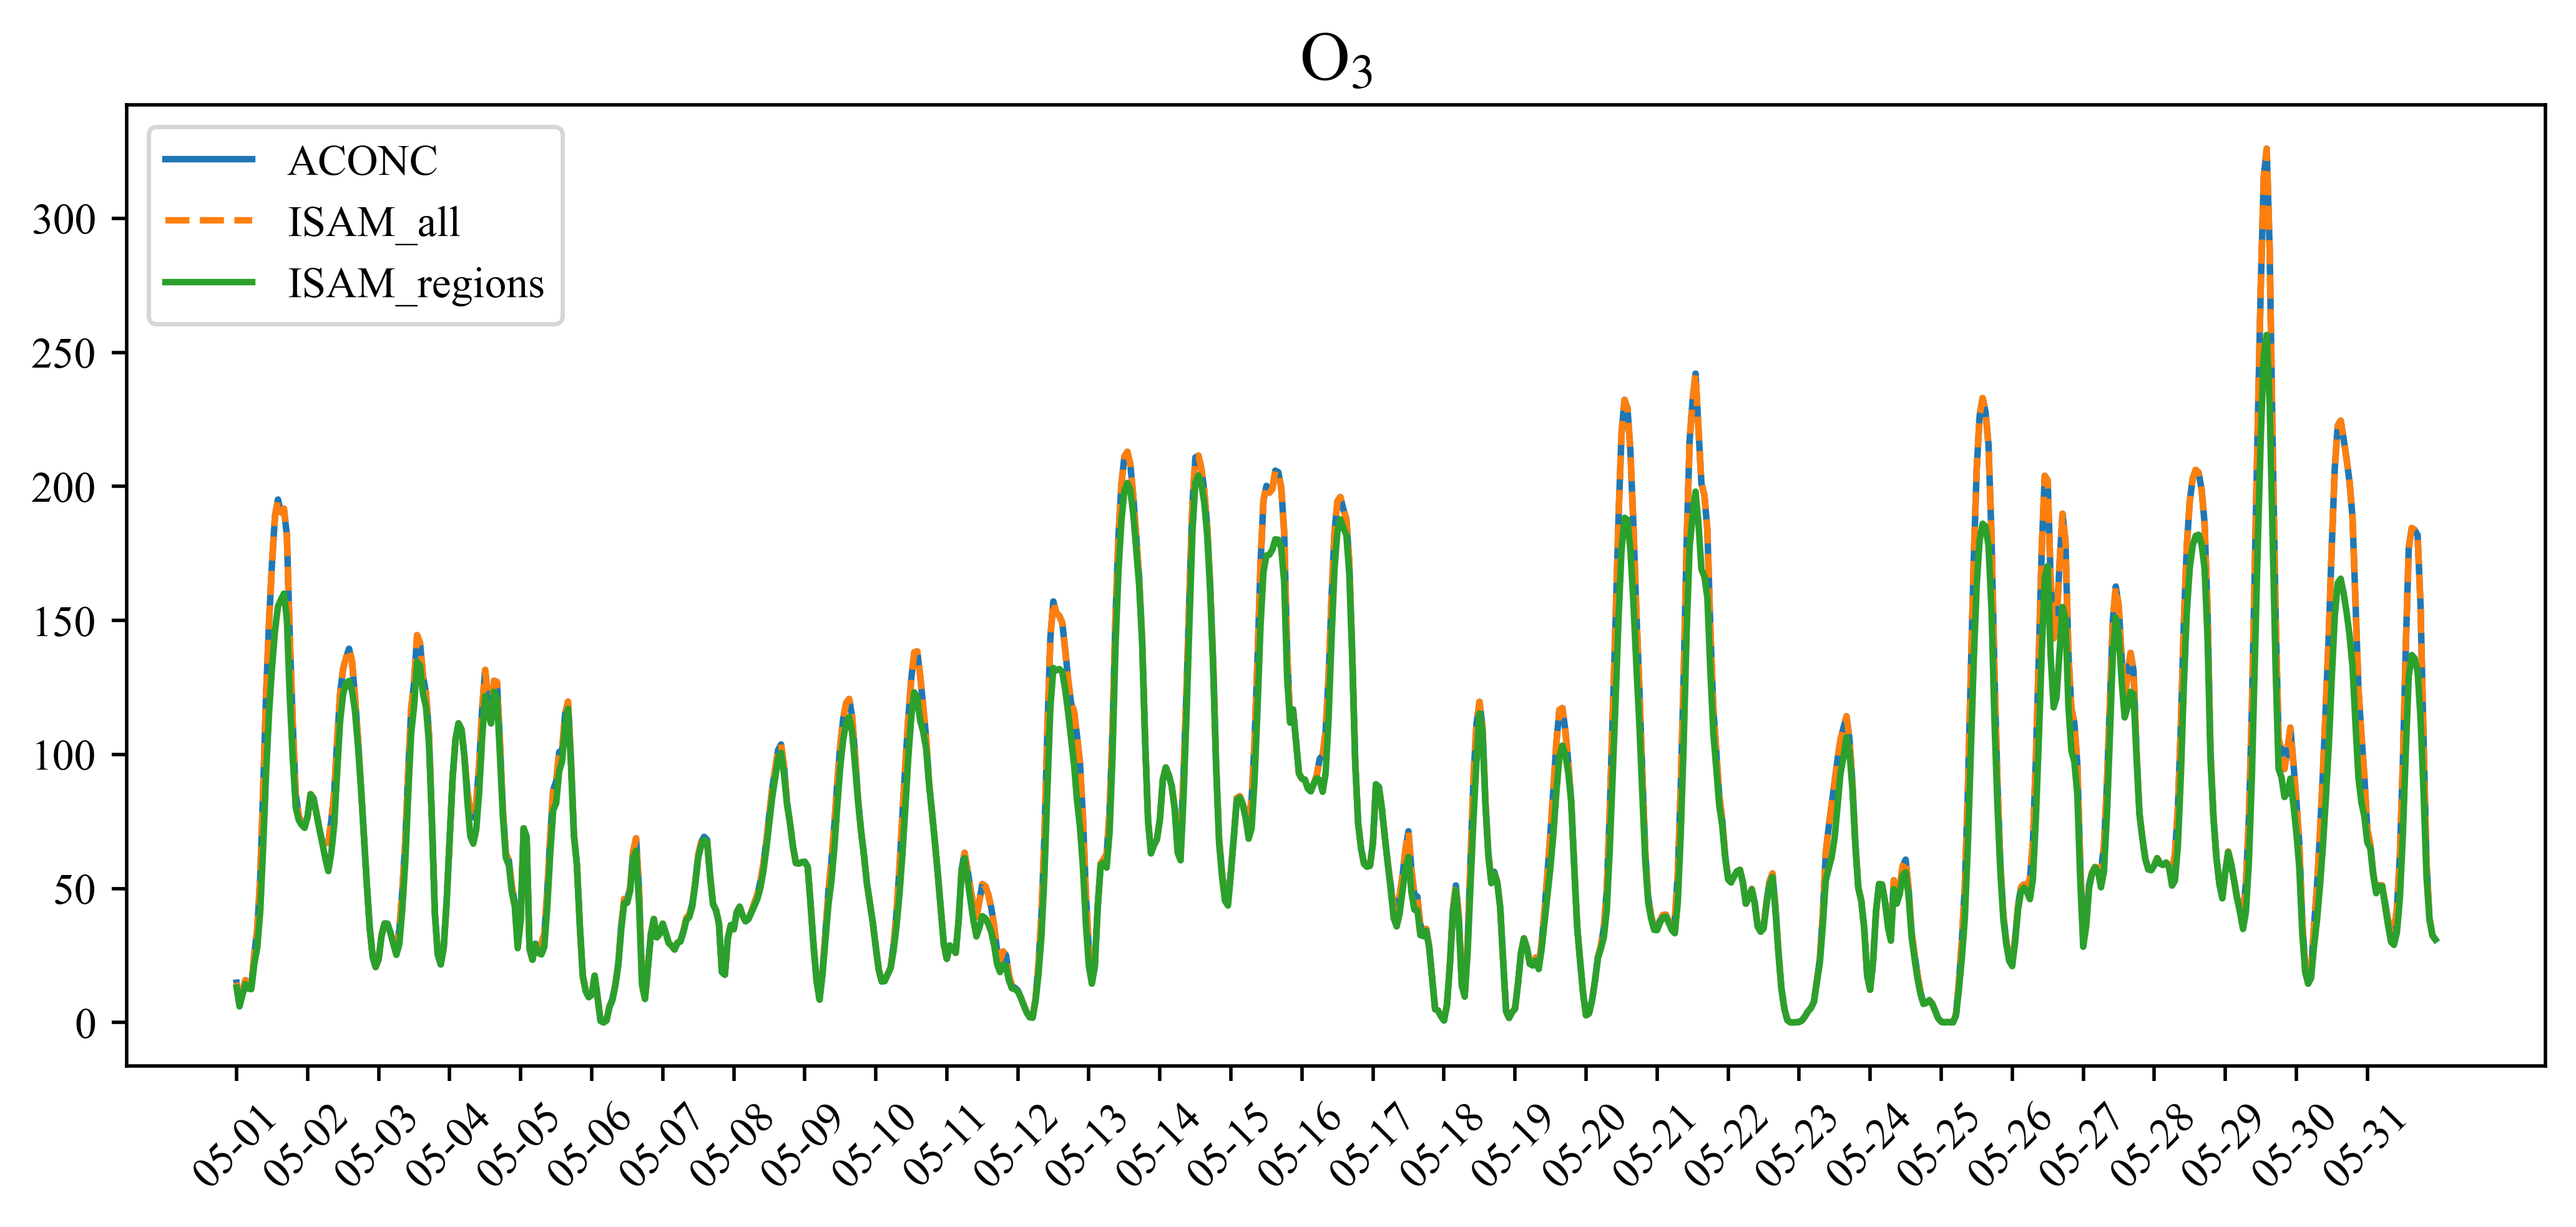

In [39]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=500)
tstep = np.arange(0,744)
ax.plot(tstep,df['O3'],label='ACONC')
ax.plot(tstep,df['sum_all'],label='ISAM_all',linestyle='--')
ax.plot(tstep,df['sum_regions'],label='ISAM_regions')

ax.set_xticks(np.arange(0,744,24))
ax.set_xticklabels(pd.date_range(timestart,timeend,freq='D').strftime('%m-%d'),rotation=45)

ax.legend(loc=2)
ax.set_title('O$_3$',size=16)
plt.show()

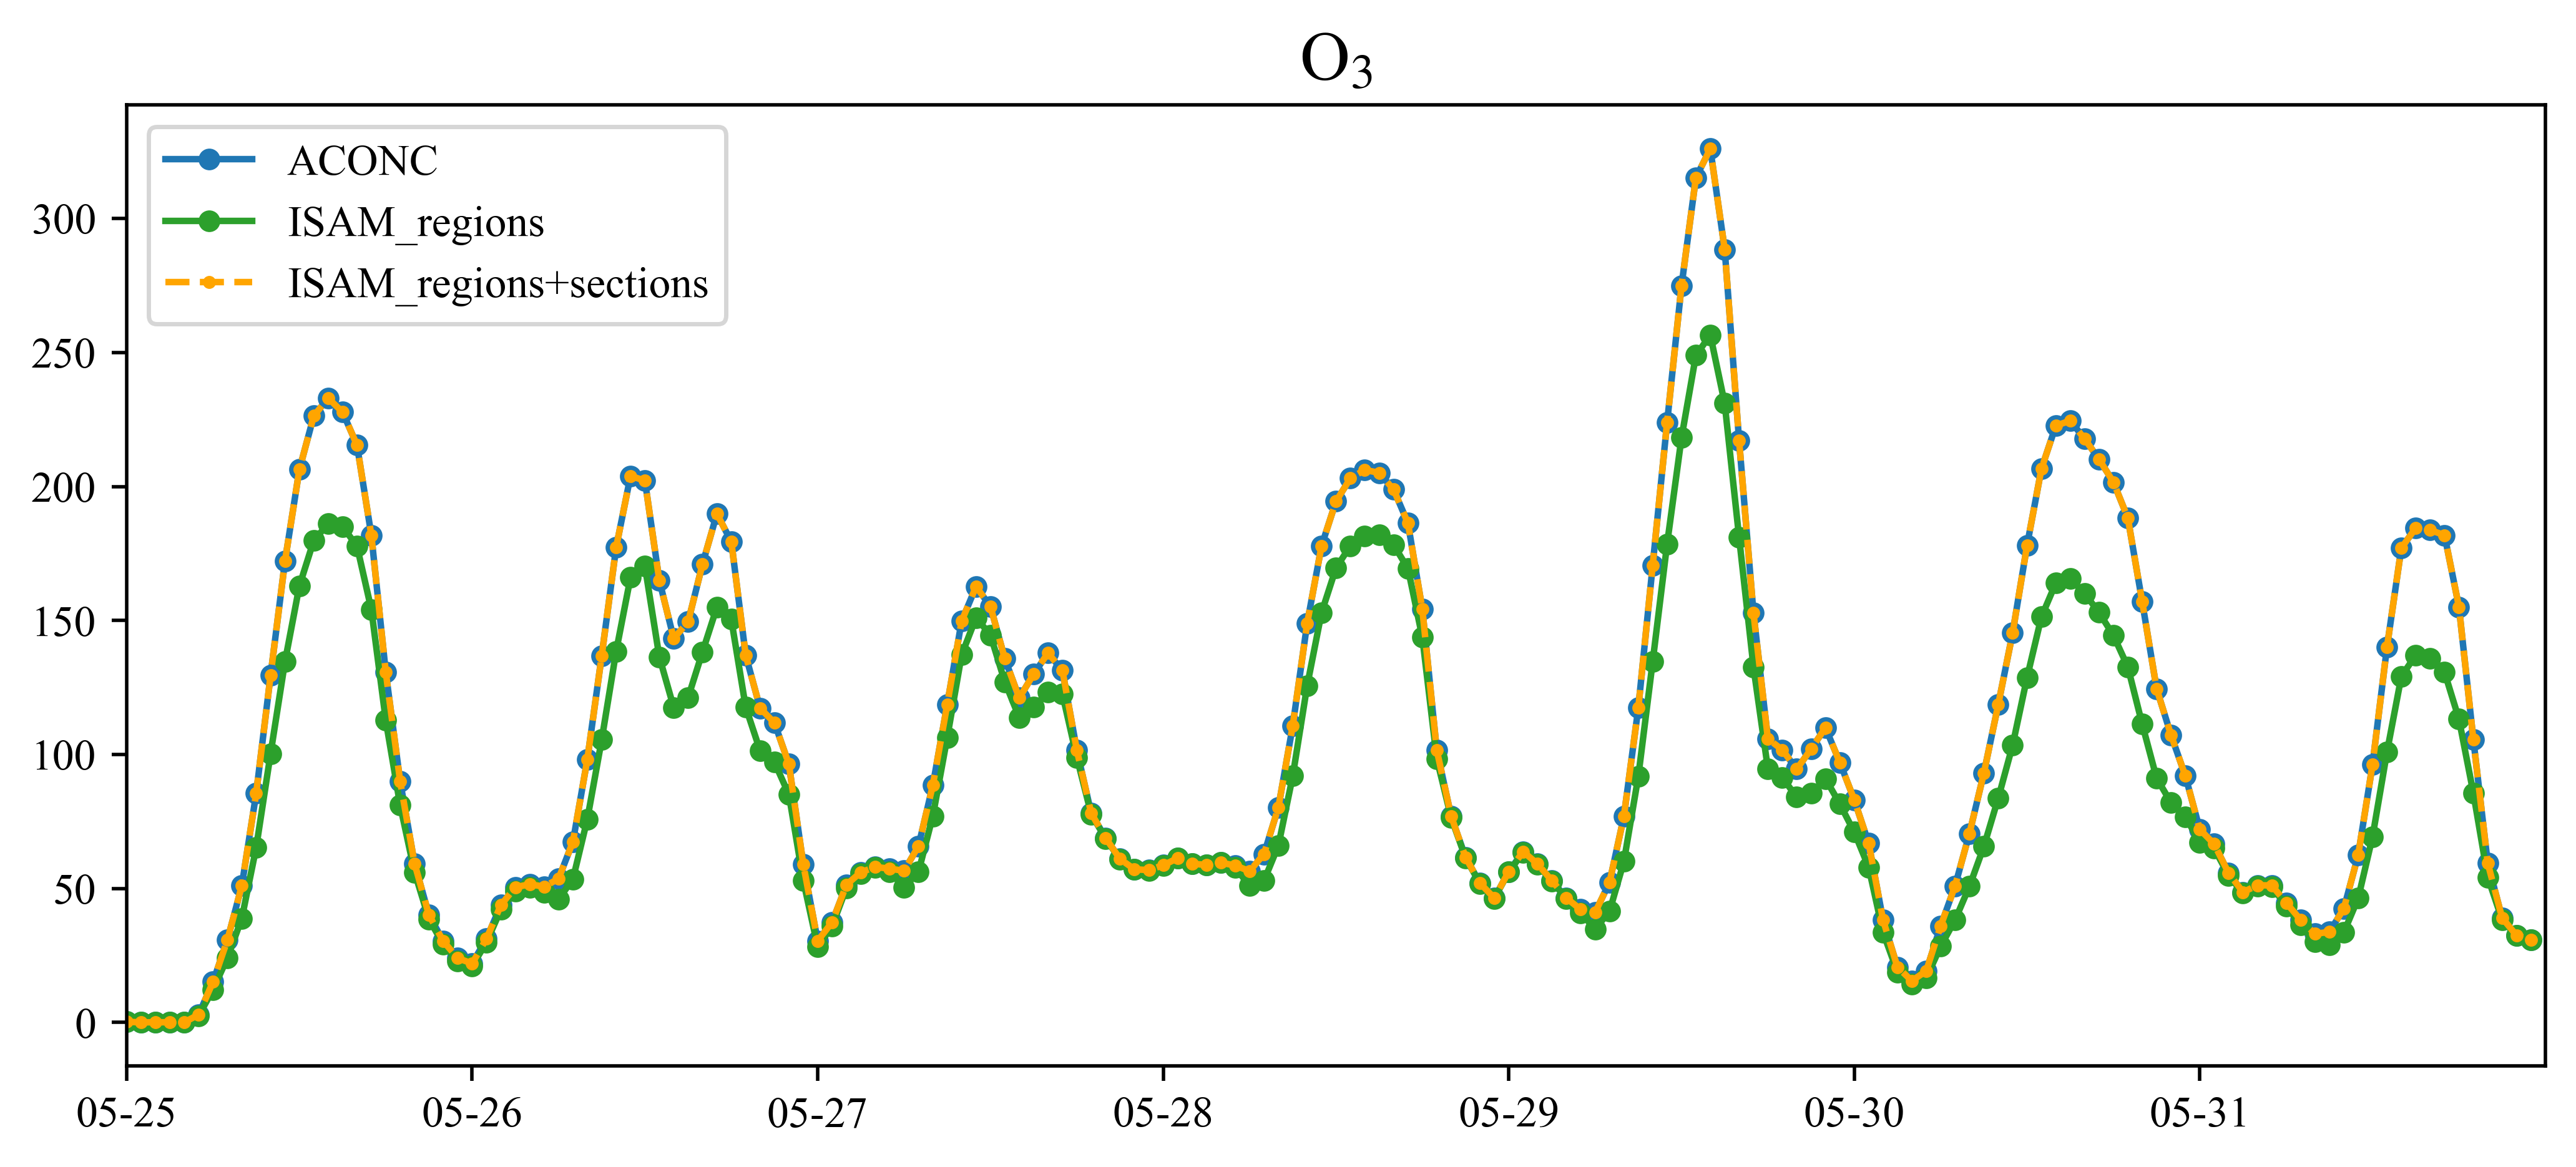

In [46]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=500)
tstep = np.arange(0,744)
ax.plot(tstep,df['O3'],label='ACONC',marker='.',markersize=8)
ax.plot(tstep,df['sum_regions'],label='ISAM_regions',marker='.',markersize=8,color='tab:green')
ax.plot(tstep,df['sum_all'],label='ISAM_regions+sections',linestyle='--',marker='.',markersize=4,color='orange')

ax.set_xticks(np.arange(0,744,24))
ax.set_xticklabels(pd.date_range(timestart,timeend,freq='D').strftime('%m-%d'))

ax.set_xlim(24*24,744)

ax.legend(loc=2)
ax.set_title('O$_3$',size=16)
plt.show()